In [1]:
import sys
import os
import numpy as np
import pandas as pd
import FdsPy.qe.myqengine as qe

In [3]:
time_series = qe.TimeSeries(start_date = '-23M',end_date = '0M', frequency='M',calendar='NAY')

univ = qe.IdUniverse(ids = ['AAPL-US','META-US','AMZN-US','NVDA-US','GOOGL-US','MSFT-US','TSLA-US'],universe_type='Equity')
data_dict = {"Broker Name":"FE_BROKER_ESTIMATE(SNAP,EPS,BKR_NAME,ANN_ROLL,+1,#DATE,,',AWIN=1D,ESTDATE=INPUT,WIN=31,')",
             'Analyst Name':"FE_BROKER_ESTIMATE(SNAP,EPS,AN_NAME,ANN,+1,#DATE,,'WIN=31,AWIN=1D,ESTDATE=INPUT,')",
             "EST_EPS_FY1":"FE_BROKER_ESTIMATE(SNAP,EPS,EST_VALUE,ANN,+1,#DATE,,'WIN=31,AWIN=1D,ESTDATE=INPUT')",
             "PREV_EST_EPS_FY1":"FE_BROKER_ESTIMATE(SNAP,EPS,PREV_VALUE,ANN,+1,#DATE,,'WIN=31,AWIN=1D,ESTDATE=INPUT')",
             "Research Date":"FE_BROKER_ESTIMATE_DATE(SNAP,EPS,INPUTDATETIME,ANN,+1,'YYYYMMDD',#DATE,,'AWIN=1D,ESTDATE=INPUT,WIN=31')",
             "Analyst ID":"FE_BROKER_ESTIMATE(SNAP,EPS,AN_ENTITY_ID,ANN,+1,#DATE,,',AWIN=1D,ESTDATE=INPUT,WIN=31,')",
             "Cumulative Return":"P_PRICE_RETURNS(1,20220831,#DATE,RANGE,USD)", 
             "Report Date":"FE_ESTIMATE_DATE(RPT_DATE,,QTR_ROLL,+1,'YYYYMMDD',#DATE,,,'')",
             "Surprise":"FE_SURPRISE(PERCENT,EPS,MEAN,QTR_ROLL,0,#DATE,,,'')",
             }
req = qe.Calculation(universe = univ, dates = time_series,data_dict=data_dict,
                                        source = 'FqlExpression',
                                        is_array=True).query()


In [7]:
req.data

,DATE,UNIVERSE,Broker Name,Analyst Name,EST_EPS_FY1,PREV_EST_EPS_FY1,Research Date,Analyst ID,Cumulative Return,Report Date,Surprise
0,20210930,AAPL-US,"[Evercore ISI, KGI Securities, Cross Research,...","[Christine Wang, Matthew Cabral, Krish Sankar,...","[5.54, 5.55, 6.2, 5.9, 5.31, 6.19, 6.36, 5.765...","[5.54, 5.55, 6.2, 5.9, 5.31, 6.19, 6.36, 5.765...","[20210915, 20210924, 20210913, 20210915, 20210...","[06GXLQ-E, 09L3VL-E, 06G8B9-E, 06TFSB-E, 079CV...",[11.7455845],[20211029],[28.628561]
1,20210930,META-US,"[Jefferies, Monness, Crespi, Hardt, Phillip Se...","[Eric James Sheridan, Douglas Anmuth, Nicolas ...","[19.04, 18.84, 18.59]","[19.04, 18.84, 18.59]","[20210913, 20210909, 20210909]","[05L9VS-E, 05QCS4-E, 06GLB8-E]",[-51.993286],[20211026],[18.665361]
2,20210930,AMZN-US,"[Evercore ISI, Monness, Crespi, Hardt, Morgan ...","[Brian Nowak, , Tom Forte, Douglas Anmuth]","[4.4465, 4.6845, 4.692, 3.394]","[4.4465, 4.6845, 4.692, 3.394]","[20210926, 20210913, 20210909, 20210909]","[06V833-E, , 06PG35-E, 05QCS4-E]",[-22.819817],[20211029],[23.613745]
3,20210930,NVDA-US,"[Arete Research LLP, Bernstein Research, Susqu...","[Brett Simpson, Stacy A. Rasgon, Joseph Moore,...","[6.81, 5.03, 5.13, 6.06]","[6.81, 5.03, 5.13, 6.06]","[20210928, 20210928, 20210920, 20210920]","[06XZ5T-E, 07NZLR-E, 0CL6Q9-E, 06M42S-E]",[-27.080519],[20211118],[2.2747092]
4,20210930,GOOGL-US,"[Monness, Crespi, Hardt, Jefferies, KeyBanc Ca...","[Brent Thill, Justin Patterson, Eric James She...","[5.88, 6.132, 6.107, 5.7665, 6.122]","[5.88, 6.132, 6.107, 5.7665, 6.122]","[20210917, 20210913, 20210913, 20210909, 20210...","[05X3RC-E, 06WM66-E, 05L9VS-E, 05LG7P-E, 05QCS...",[-19.043064],[20211027],[41.673744]
...,...,...,...,...,...,...,...,...,...,...,...
163,20230831,AMZN-US,"[Wolfe Research, Bernstein Research, DA Davids...","[Deepak Mathivanan, Mark Shmulik, Tom Forte, B...","[2.4, 2.0986, 1.74, 2.35, 2.24, 2.21, 2.28, 2....","[2.4, 2.0986, 1.74, 2.35, 2.24, 2.21, 2.28, 2....","[20230817, 20230804, 20230811, 20230829, 20230...","[0C92NM-E, 0LTXHY-E, 06PG35-E, 06091D-E, 06SHJ...",[8.866453],[20231026],[83.66317]
164,20230831,NVDA-US,"[Guosen Securities, Wedbush Securities, New St...","[Qi Xie, Matthew Bryson, Pierre Ferragu, Ben R...","[10.1, 10.62, 11.09, 10.88, 10.8, 10.8, 10.62,...","[10.1, 10.62, 11.09, 10.88, 10.8, 10.8, 10.62,...","[20230831, 20230831, 20230824, 20230829, 20230...","[0K812S-E, 0614SS-E, 079CVR-E, 05L3XG-E, 05KTQ...",[227.09021],[20231122],[29.693375]
165,20230831,GOOGL-US,"[Edgewater Research, Wolfe Research, China Int...","[Joe Wittine, Deepak Mathivanan, Vincent Bai, ...","[5.67, 5.7321, 5.71, 5.711193, 5.89, 5.66, 5.8...","[5.67, 5.7321, 5.71, 5.711193, 5.89, 5.66, 5.8...","[20230831, 20230831, 20230831, 20230830, 20230...","[06T1N1-E, 0C92NM-E, 0G3GR0-E, 06WM66-E, 05LG7...",[25.827015],[20231024],[7.134389]
166,20230831,MSFT-US,"[Arete Research LLP, Jefferies, MoffettNathans...","[Adam Shepherd, Brent Thill, Sterling Auty, Ti...","[11.07, 10.68, 10.85, 11.02, 10.785337, 10.83,...","[11.07, 10.68, 10.85, 11.02, 10.785337, 10.83,...","[20230830, 20230829, 20230828, 20230825, 20230...","[06SK18-E, 05X3RC-E, 06J05L-E, 05KWGQ-E, 0FDNV...",[26.39308],[20231025],[5.464335]


In [9]:
df = req.data.reset_index().set_index('UNIVERSE')

df['DATE'] = pd.to_datetime(df['DATE']).apply(lambda x:x.strftime("%m/%d/%Y"))
df['Cumulative Return']= df['Cumulative Return'].apply(lambda x:x[0])
df['Report Date']= pd.to_datetime(df['Report Date'].apply(lambda x: x[0]))
df['Surprise']= df['Surprise'].apply(lambda x: x[0]).astype(float)
df_aapl = pd.concat([df['Analyst ID'].explode().reset_index()[['UNIVERSE','Analyst ID']],df['Broker Name'].explode().reset_index().iloc[:,-1:],df['Analyst Name'].explode().reset_index().iloc[:,-1:],df['EST_EPS_FY1'].explode().reset_index().iloc[:,-1:],df['PREV_EST_EPS_FY1'].explode().reset_index().iloc[:,-1:],df['Research Date'].explode().reset_index().iloc[:,-1:]],axis=1)
df_aapl['Research Date'] = pd.to_datetime(df_aapl['Research Date'])
df_aapl = df_aapl.replace('Restricted',np.nan).replace('@NA',np.nan)
df_aapl = df_aapl.groupby(['Research Date','Broker Name','UNIVERSE']).agg({'EST_EPS_FY1':'mean'})

df_aapl.head()

EST_EPS_FY1
Research Date Broker Name            UNIVERSE             
2021-09-07    Monness, Crespi, Hardt TSLA-US         1.940
2021-09-08    Cowen & Company        AAPL-US         6.010
2021-09-09    Arete Research LLP     AMZN-US         3.394
              BNP Paribas Exane      META-US        18.590
              JP Morgan              MSFT-US        12.950

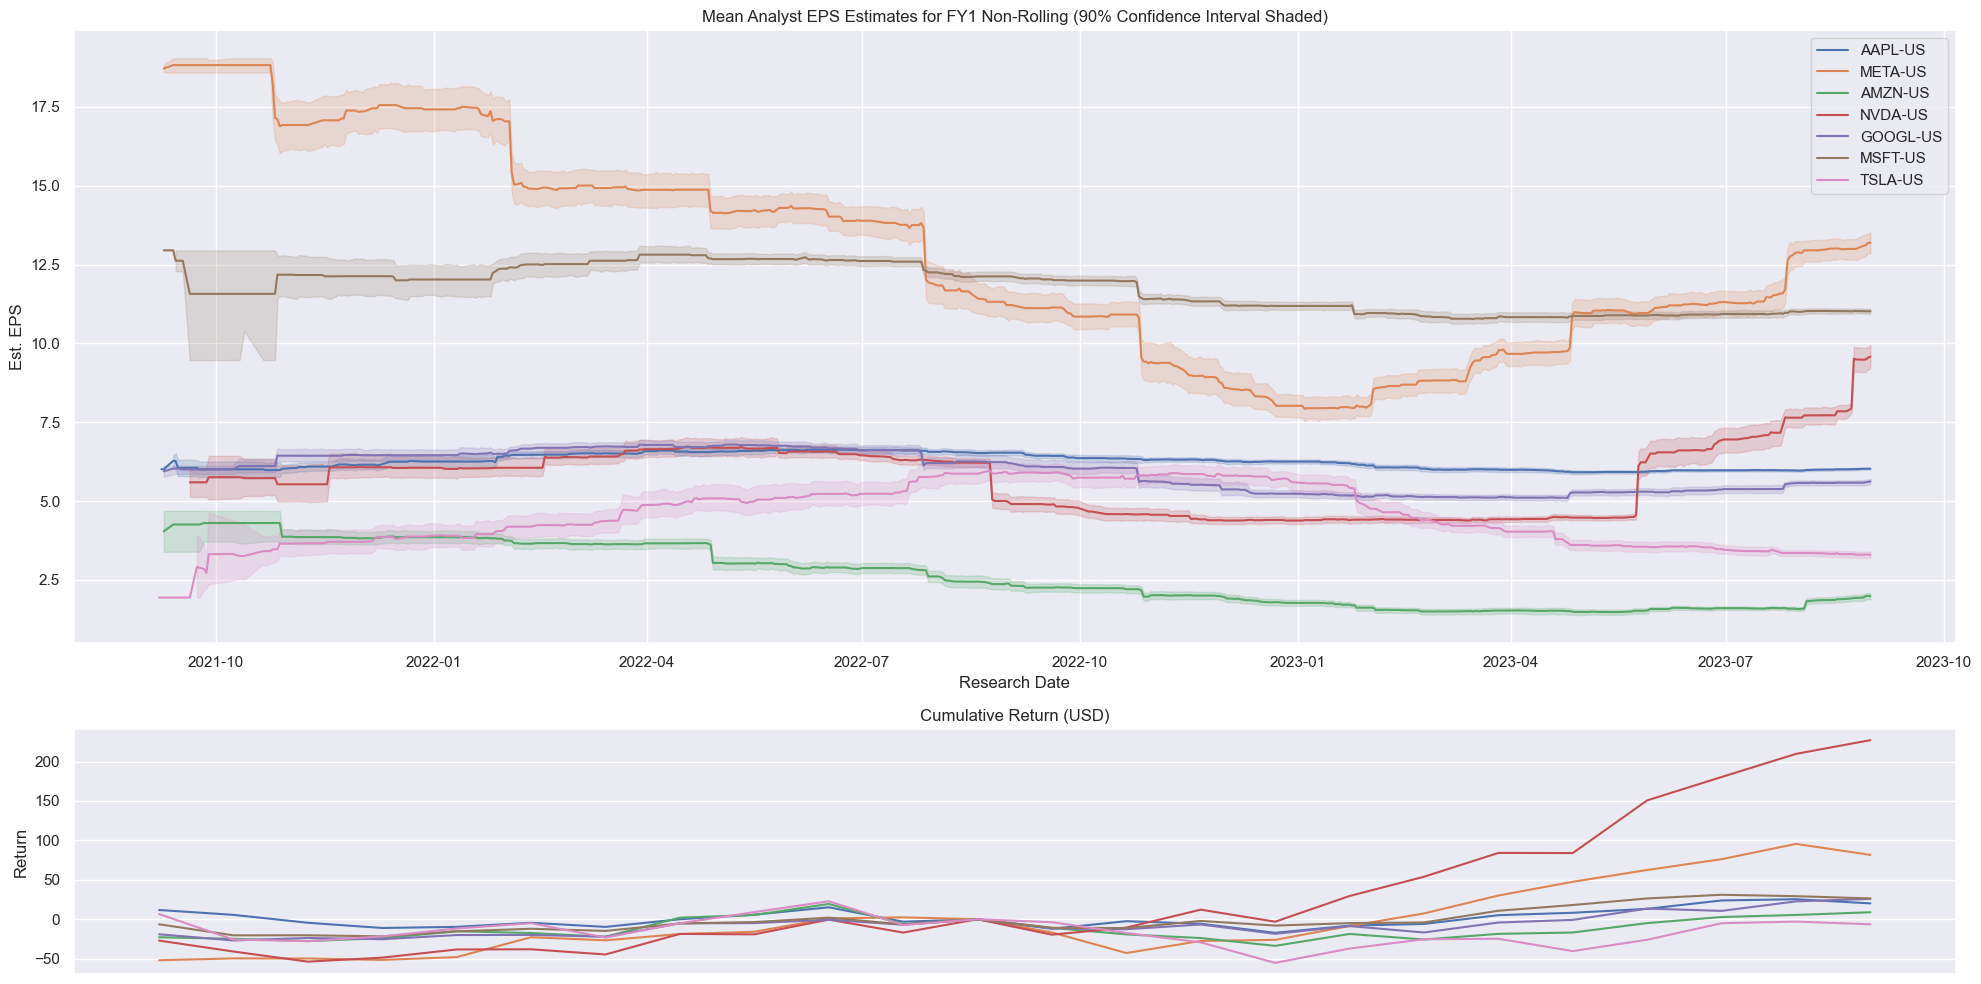

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.dates as mdates
sns.set_theme(style="darkgrid")
fig,axs = plt.subplots(2,1,figsize=(20,10),gridspec_kw={'height_ratios': [2.5, 1]})

sns.lineplot(df_aapl['EST_EPS_FY1'].unstack().unstack().ffill(limit = 90).stack().stack().rename('EST_EPS_FY1').reset_index(),
                x = 'Research Date',y = 'EST_EPS_FY1',hue = 'UNIVERSE',ax=axs[0],hue_order = list(df.index.unique()))
axs[0].set_title('Mean Analyst EPS Estimates for FY1 Non-Rolling (90% Confidence Interval Shaded)')
axs[0].set_ylabel('Est. EPS')
axs[0].legend(loc='upper right')

sns.lineplot(df.reset_index(),
                x = 'DATE',y = 'Cumulative Return',hue = 'UNIVERSE',ax=axs[1],hue_order = list(df.index.unique()))
axs[1].set_title('Cumulative Return (USD)')
axs[1].set_ylabel('Return')
axs[1].get_legend().remove()
locator = mdates.MonthLocator()  # every month
axs[1].xaxis.set_major_locator(locator)
fmt = mdates.DateFormatter('%b')
axs[1].xaxis.set_major_formatter(fmt)
axs[1].set_xticks([])
axs[1].set(xlabel=None)
plt.subplots_adjust(hspace = 0.5)
plt.savefig('magnificant_7_FYE1_Broker_EPS_Estimates.png', format='png', dpi=100)

plt.tight_layout()

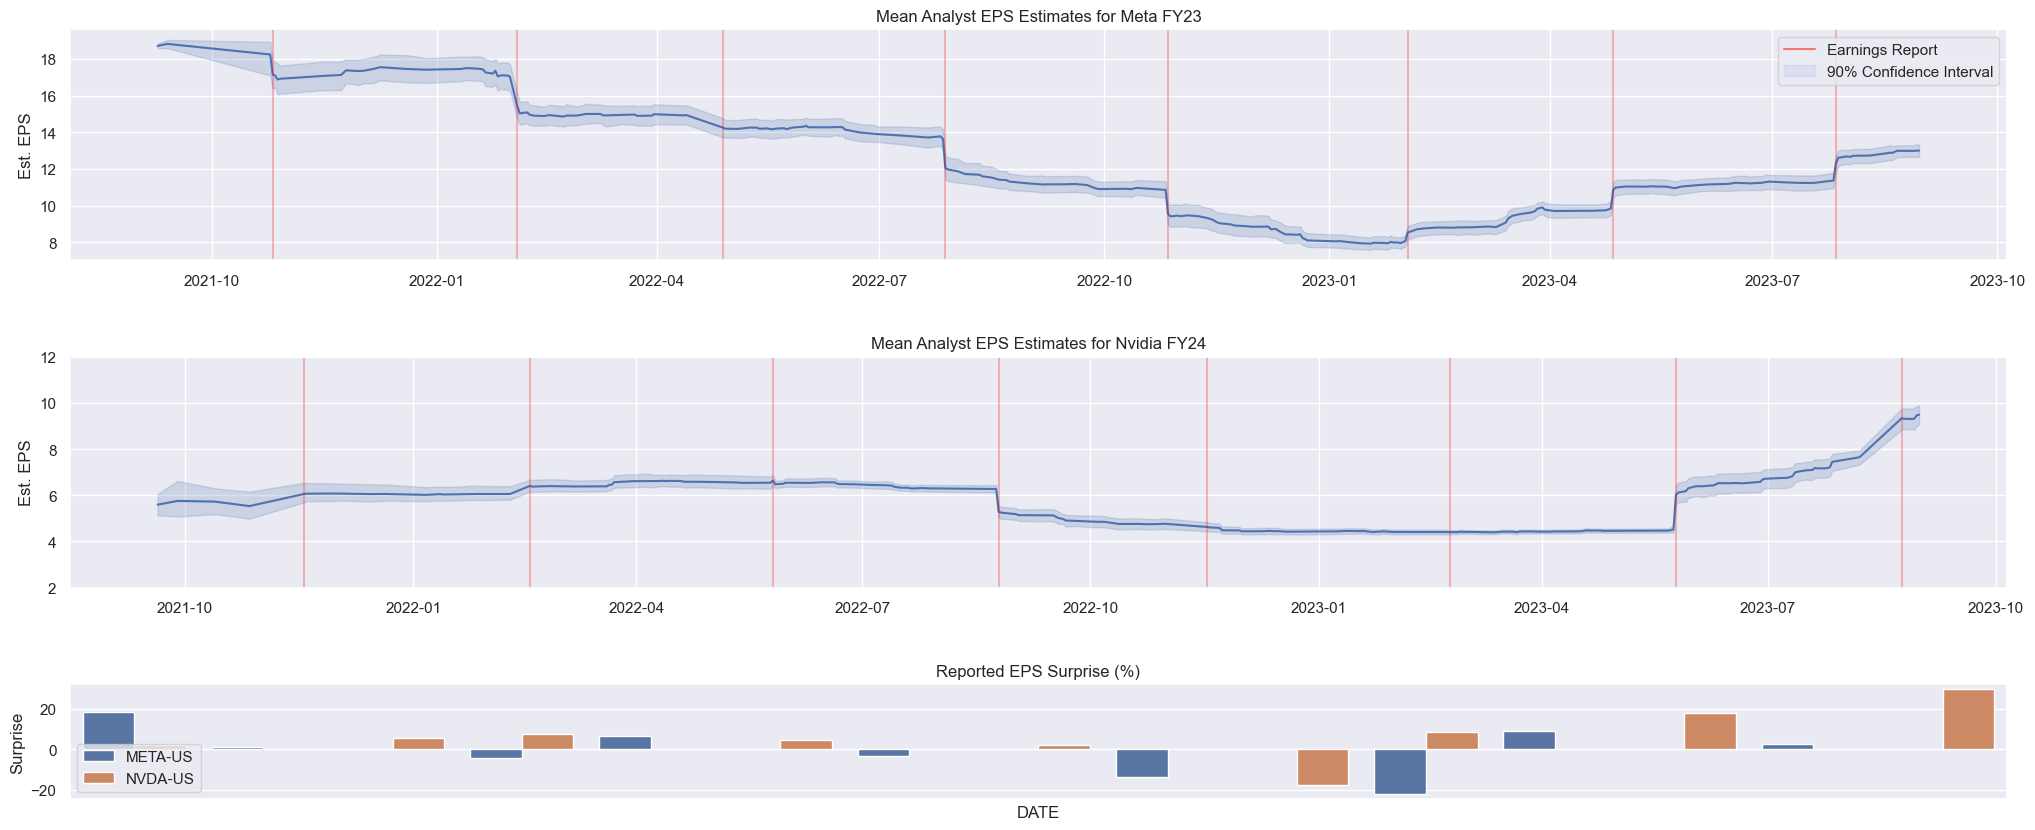

In [14]:

sns.set_theme(style="darkgrid")
fig,axs = plt.subplots(3,1,figsize=(25,10),gridspec_kw={'height_ratios': [2,2, 1]})
# Create a patch for the 90% confidence interval
confidence_patch = mpatches.Patch(color='blue', label='90% Confidence Interval',alpha =.05)

# Create a line for the Quarterly Report
line = mlines.Line2D([], [], color='red', label='Earnings Report',alpha = .5)


df_mn = df_aapl.reset_index()[df_aapl.reset_index()['UNIVERSE'].isin(['META-US'])].set_index(['Research Date','Broker Name','UNIVERSE'])
sns.lineplot(data=df_mn['EST_EPS_FY1'].unstack().unstack().ffill(limit = 45).stack().stack().rename('EST_EPS_FY1').reset_index(), x='Research Date', y='EST_EPS_FY1',hue='UNIVERSE', ax=axs[0])

for report_date in list(df.xs('META-US')['Report Date'].unique())[:-1]:
    axs[0].axvline(report_date, color = 'red', label = 'Quarterly Report',alpha = .25)
axs[0].set_xlabel('')
axs[0].set_title('Mean Analyst EPS Estimates for Meta FY23')
axs[0].get_legend().remove()
axs[0].set_ylabel('Est. EPS')
axs[0].legend(handles=[line, confidence_patch])
#sns.barplot(df_n.iloc[:,1].reset_index(),ax=axs[0],x='Date',y='NVDA-US')
df_mn = df_aapl.reset_index()[df_aapl.reset_index()['UNIVERSE'].isin(['NVDA-US'])].set_index(['Research Date','Broker Name','UNIVERSE'])
sns.lineplot(data=df_mn['EST_EPS_FY1'].unstack().unstack().ffill(limit = 45).stack().stack().rename('EST_EPS_FY1').reset_index(), x='Research Date', y='EST_EPS_FY1', hue='UNIVERSE', ax=axs[1])

for report_date in list(df.xs('NVDA-US')['Report Date'].unique())[:-1]:
    axs[1].axvline(report_date, color = 'red', label = 'Quarterly Report',alpha = .25)
axs[1].set_xlabel('')
axs[1].set_ylim((2,12))
axs[1].set_title('Mean Analyst EPS Estimates for Nvidia FY24')
axs[1].get_legend().remove()
axs[1].set_ylabel('Est. EPS')

df_temp = df.reset_index()
df_temp = df_temp[df_temp['UNIVERSE'].isin(['META-US','NVDA-US'])]
sns.barplot(data=df_temp[['UNIVERSE','Surprise','DATE']].drop_duplicates('Surprise'),x='DATE',y='Surprise',hue='UNIVERSE',ax=axs[2])
locator = mdates.MonthLocator()  # every month
axs[2].xaxis.set_major_locator(locator)
fmt = mdates.DateFormatter('%b')
axs[2].xaxis.set_major_formatter(fmt)
axs[2].set_title('Reported EPS Surprise (%)')
axs[2].set_xticks([])
axs[2].legend(loc='lower left')
plt.subplots_adjust(hspace = 0.5)
plt.savefig('META_NVIDIA_WITH_SURPRISE.png', format='png', dpi=100)

plt.show()
